## Introduction to pyplot

matplotlib.pyplot is a collection of functions that make matplotlib work like MATLAB. Each pyplot function makes some change to a figure: e.g., creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels, etc.

### Generating visualizations with pyplot is very quick:

In [1]:
import matplotlib.pyplot as plt

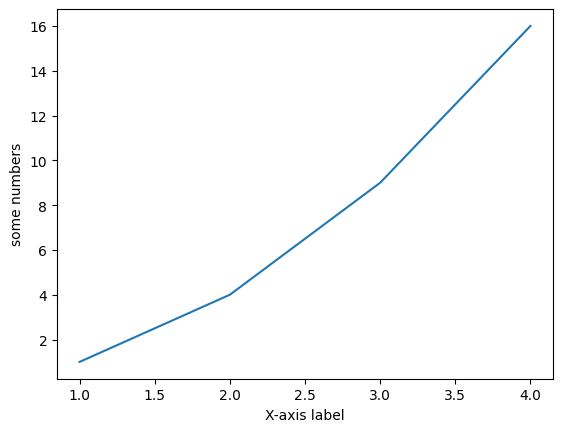

In [3]:
plt.plot([1, 2, 3,4], [1, 4, 9, 16])
plt.xlabel('X-axis label')
plt.ylabel('some numbers')
plt.show()

plot is a versatile function, and will take an arbitrary number of arguments. For example, to plot x versus y, you can write:

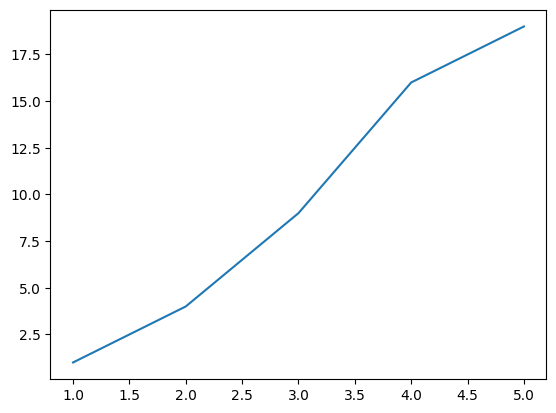

In [6]:
plt.plot([1, 2, 3,4,5], [1, 4, 9, 16, 19])

### Formatting the style of your plot
For every x, y pair of arguments, there is an optional third argument which is the format string that indicates the color and line type of the plot.

<function matplotlib.pyplot.show(close=None, block=None)>

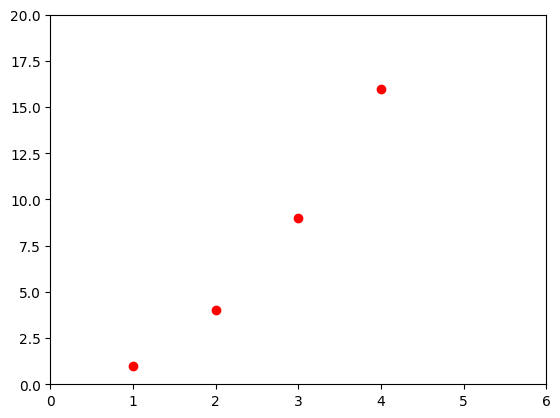

In [9]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16], 'ro')
plt.axis([0, 6, 0, 20])
plt.show

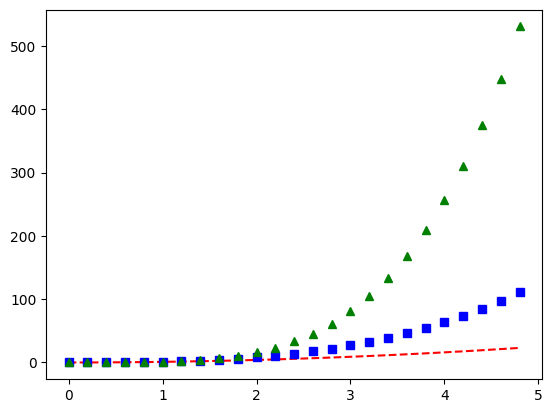

In [11]:
import numpy as np

# evenly sampled time at 200ms intervals
t = np.arange(0., 5., 0.2)
# red dashes, blue squares and green triangles
plt.plot(t, t**2, 'r--', t, t**3, 'bs', t, t**4, 'g^')
plt.show()

### Plotting with keyword 
There are some instances where you have data in a format that lets you access particular variables with strings. For example, with structured arrays or pandas.DataFrame.

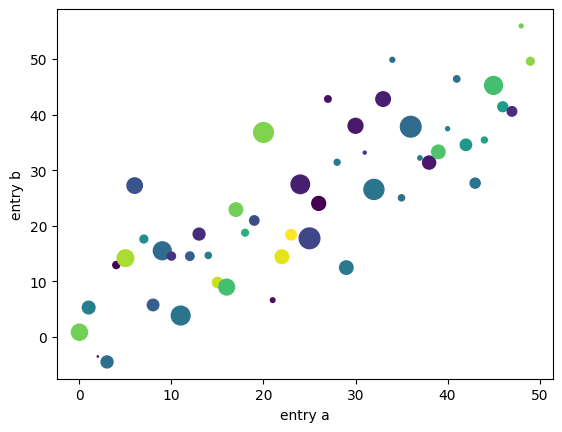

In [12]:
data = {'a': np.arange(50),
        'c': np.random.randint(0, 50, 50),
        'd': np.random.randn(50)}
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100

plt.scatter('a', 'b', c='c', s='d', data=data)
plt.xlabel('entry a')
plt.ylabel('entry b')
plt.show()

### Plotting with categorical variables
It is also possible to create a plot using categorical variables. Matplotlib allows you to pass categorical variables directly to many plotting functions. For example:

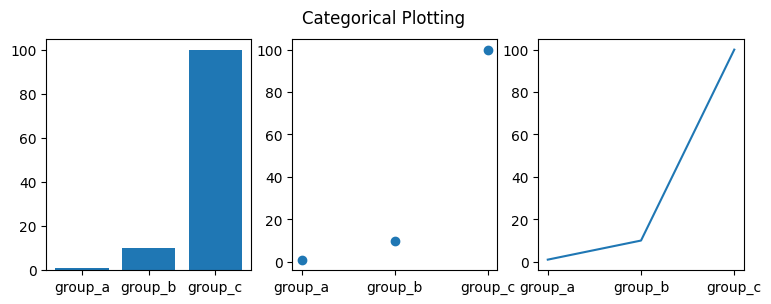

In [15]:
names = ['group_a', 'group_b', 'group_c']
values = [1, 10, 100]

plt.figure(figsize=(9, 3))

plt.subplot(131)
plt.bar(names, values)
plt.subplot(132)
plt.scatter(names, values)
plt.subplot(133)
plt.plot(names, values)
plt.suptitle('Categorical Plotting')
plt.show()

## Working with multiple figures and Axes
MATLAB, and pyplot, have the concept of the current figure and the current Axes. All plotting functions apply to the current Axes. The function gca returns the current Axes (a matplotlib.axes.Axes instance), and gcf returns the current figure (a matplotlib.figure.Figure instance).

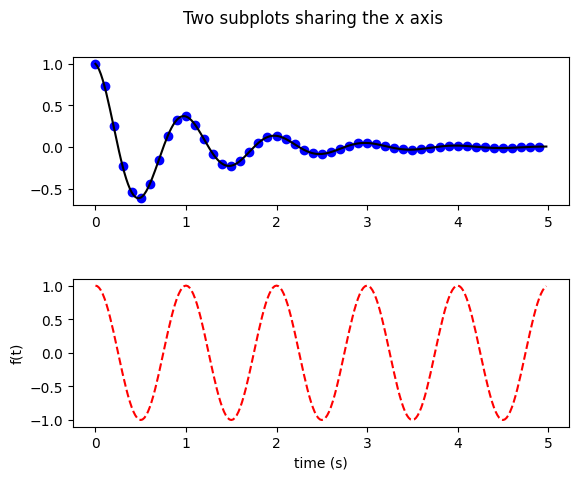

In [18]:
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

plt.figure()
plt.subplot(211)
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k')

plt.subplot(212)
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')
plt.xlabel('time (s)')
plt.ylabel('f(t)')
plt.suptitle('Two subplots sharing the x axis')
plt.subplots_adjust(hspace=0.5)
plt.show()

## Working with text 
text can be used to add text in an arbitrary location, and xlabel, ylabel and title are used to add text in the indicated locations

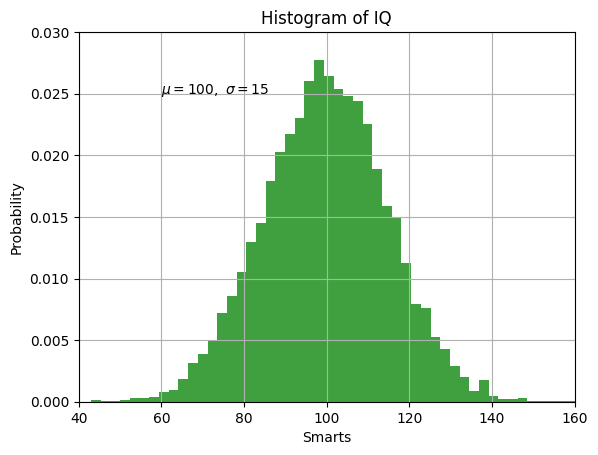

In [23]:
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(x, 50, density=True, facecolor='g', alpha=0.75)


plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()

## Annotating text
The uses of the basic text function above place text at an arbitrary position on the Axes. A common use for text is to annotate some feature of the plot, and the annotate method provides helper functionality to make annotations easy. 

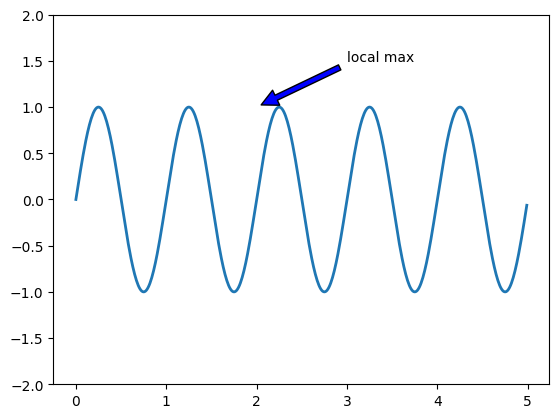

In [29]:
ax = plt.subplot()

t = np.arange(0.0, 5.0, 0.01)
s = np.sin(2*np.pi*t)
line, = plt.plot(t, s, lw=2)

plt.annotate('local max', xy=(2, 1), xytext=(3, 1.5),
             arrowprops=dict(facecolor='blue', shrink=0.05),
             )

plt.ylim(-2, 2)
plt.show()

## Logarithmic and other nonlinear axes
matplotlib.pyplot supports not only linear axis scales, but also logarithmic and logit scales. This is commonly used if data spans many orders of magnitude.

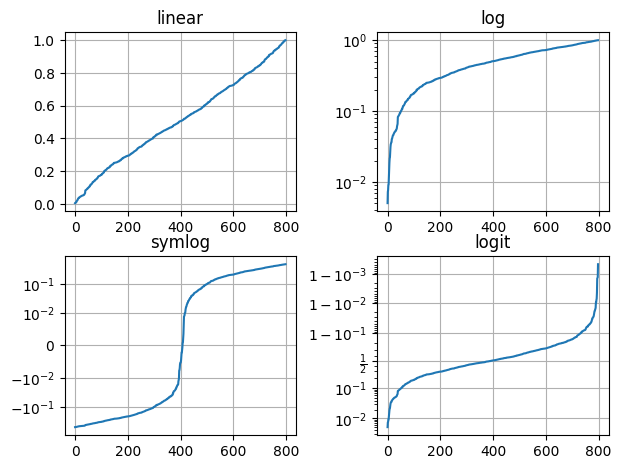

In [34]:
# Fixing random state for reproducibility
np.random.seed(19680801)

# make up some data in the open interval (0, 1)
y = np.random.normal(loc=0.5, scale=0.4, size=1000)
y = y[(y > 0) & (y < 1)]
y.sort()
x = np.arange(len(y))

# plot with various axes scales
plt.figure()

# linear
plt.subplot(221)
plt.plot(x, y)
plt.yscale('linear')
plt.title('linear')
plt.grid(True)

# log
plt.subplot(222)
plt.plot(x, y)
plt.yscale('log')
plt.title('log')
plt.grid(True)

# symmetric log
plt.subplot(223)
plt.plot(x, y - y.mean())
plt.yscale('symlog', linthresh=0.01)
plt.title('symlog')
plt.grid(True)

# logit
plt.subplot(224)
plt.plot(x, y)
plt.yscale('logit')
plt.title('logit')
plt.grid(True)
# Adjust the subplot layout, because the logit one may take more space
# than usual, due to y-tick labels like "1 - 10^{-3}"
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)

plt.show()